In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "../config/rf_2.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

415it [00:00, 4142.72it/s]

centering images


15429it [00:03, 4144.68it/s]
  0%|          | 40/20000 [00:00<04:27, 74.53it/s]

outlier
outlier


  0%|          | 90/20000 [00:01<03:55, 84.45it/s]

outlier
outlier


  1%|          | 190/20000 [00:02<03:41, 89.59it/s]

outlier


  2%|▏         | 409/20000 [00:04<03:35, 90.70it/s]

outlier
outlier


  3%|▎         | 549/20000 [00:05<03:31, 91.75it/s]

outlier


  3%|▎         | 619/20000 [00:06<03:30, 92.13it/s]

outlier
outlier
outlier


  3%|▎         | 688/20000 [00:07<03:31, 91.28it/s]

outlier


  4%|▍         | 778/20000 [00:08<03:29, 91.74it/s]

outlier


  4%|▍         | 798/20000 [00:08<03:29, 91.82it/s]

outlier
outlier


  4%|▍         | 858/20000 [00:09<03:28, 92.02it/s]

outlier


  5%|▍         | 935/20000 [00:10<03:30, 90.72it/s]

outlier


  5%|▍         | 985/20000 [00:10<03:29, 90.97it/s]

outlier
outlier


  5%|▌         | 1005/20000 [00:11<03:29, 90.53it/s]

outlier


  6%|▌         | 1172/20000 [00:12<03:28, 90.44it/s]

outlier
outlier


  6%|▋         | 1272/20000 [00:14<03:26, 90.85it/s]

outlier


  7%|▋         | 1332/20000 [00:14<03:25, 91.05it/s]

outlier


  7%|▋         | 1362/20000 [00:14<03:24, 91.14it/s]

outlier


  7%|▋         | 1422/20000 [00:15<03:23, 91.32it/s]

outlier


  7%|▋         | 1472/20000 [00:16<03:22, 91.45it/s]

outlier


  8%|▊         | 1532/20000 [00:16<03:21, 91.65it/s]

outlier


  9%|▊         | 1702/20000 [00:18<03:18, 92.20it/s]

outlier


  9%|▉         | 1782/20000 [00:19<03:17, 92.39it/s]

outlier


  9%|▉         | 1812/20000 [00:19<03:16, 92.45it/s]

outlier
outlier


 10%|▉         | 1951/20000 [00:21<03:15, 92.28it/s]

outlier
outlier


 10%|█         | 2047/20000 [00:22<03:15, 91.91it/s]

outlier
outlier


 10%|█         | 2086/20000 [00:22<03:15, 91.66it/s]

outlier


 12%|█▏        | 2356/20000 [00:25<03:11, 92.04it/s]

outlier


 12%|█▏        | 2476/20000 [00:26<03:10, 92.16it/s]

outlier
outlier


 13%|█▎        | 2504/20000 [00:27<03:10, 91.88it/s]

outlier
outlier


 13%|█▎        | 2594/20000 [00:28<03:09, 92.06it/s]

outlier


 13%|█▎        | 2634/20000 [00:28<03:08, 92.13it/s]

outlier
outlier


 14%|█▍        | 2804/20000 [00:30<03:06, 92.42it/s]

outlier


 15%|█▍        | 2953/20000 [00:32<03:06, 91.53it/s]

outlier


 15%|█▍        | 2983/20000 [00:32<03:05, 91.58it/s]

outlier


 16%|█▌        | 3142/20000 [00:34<03:04, 91.54it/s]

outlier
outlier


 16%|█▋        | 3259/20000 [00:35<03:03, 91.18it/s]

outlier


 16%|█▋        | 3294/20000 [00:36<03:03, 91.00it/s]

outlier


 17%|█▋        | 3314/20000 [00:36<03:03, 91.02it/s]

outlier


 17%|█▋        | 3354/20000 [00:36<03:02, 91.06it/s]

outlier
outlier
outlier


 17%|█▋        | 3444/20000 [00:37<03:01, 91.16it/s]

outlier


 19%|█▉        | 3763/20000 [00:41<02:57, 91.38it/s]

outlier
outlier


 19%|█▉        | 3813/20000 [00:41<02:57, 91.43it/s]

outlier
outlier


 20%|██        | 4023/20000 [00:43<02:54, 91.57it/s]

outlier
outlier


 21%|██        | 4112/20000 [00:45<02:53, 91.35it/s]

outlier
outlier


 21%|██        | 4138/20000 [00:45<02:54, 91.07it/s]

outlier


 21%|██        | 4158/20000 [00:45<02:53, 91.09it/s]

outlier


 21%|██        | 4208/20000 [00:46<02:53, 91.00it/s]

outlier


 23%|██▎       | 4562/20000 [00:50<02:50, 90.34it/s]

outlier
outlier


 23%|██▎       | 4669/20000 [00:51<02:50, 90.16it/s]

outlier


 24%|██▍       | 4788/20000 [00:53<02:48, 90.12it/s]

outlier


 25%|██▍       | 4906/20000 [00:54<02:47, 90.06it/s]

outlier


 25%|██▍       | 4996/20000 [00:55<02:46, 90.17it/s]

outlier
outlier


 26%|██▌       | 5145/20000 [00:57<02:44, 90.16it/s]

outlier


 26%|██▌       | 5215/20000 [00:57<02:43, 90.24it/s]

outlier


 27%|██▋       | 5415/20000 [00:59<02:41, 90.45it/s]

outlier


 27%|██▋       | 5485/20000 [01:00<02:40, 90.40it/s]

outlier
outlier


 28%|██▊       | 5504/20000 [01:00<02:40, 90.39it/s]

outlier


 28%|██▊       | 5576/20000 [01:01<02:40, 90.13it/s]

outlier


 29%|██▉       | 5796/20000 [01:04<02:37, 90.33it/s]

outlier


 30%|██▉       | 5906/20000 [01:05<02:35, 90.41it/s]

outlier


 31%|███       | 6202/20000 [01:08<02:32, 90.38it/s]

outlier


 31%|███▏      | 6252/20000 [01:09<02:32, 90.42it/s]

outlier


 32%|███▏      | 6312/20000 [01:09<02:31, 90.46it/s]

outlier


 32%|███▏      | 6457/20000 [01:11<02:30, 90.26it/s]

outlier


 32%|███▏      | 6497/20000 [01:11<02:29, 90.28it/s]

outlier


 33%|███▎      | 6567/20000 [01:12<02:28, 90.33it/s]

outlier


 34%|███▍      | 6787/20000 [01:15<02:26, 90.48it/s]

outlier


 34%|███▍      | 6897/20000 [01:16<02:24, 90.55it/s]

outlier
outlier


 35%|███▌      | 7086/20000 [01:18<02:23, 90.23it/s]

outlier
outlier
outlier


 36%|███▌      | 7186/20000 [01:19<02:21, 90.29it/s]

outlier


 36%|███▌      | 7206/20000 [01:19<02:21, 90.30it/s]

outlier


 37%|███▋      | 7326/20000 [01:21<02:20, 90.37it/s]

outlier
outlier


 37%|███▋      | 7426/20000 [01:22<02:19, 90.43it/s]

outlier


 37%|███▋      | 7476/20000 [01:22<02:18, 90.46it/s]

outlier


 38%|███▊      | 7536/20000 [01:23<02:17, 90.49it/s]

outlier
outlier


 38%|███▊      | 7556/20000 [01:23<02:17, 90.51it/s]

outlier


 38%|███▊      | 7596/20000 [01:23<02:17, 90.53it/s]

outlier


 39%|███▉      | 7752/20000 [01:25<02:15, 90.41it/s]

outlier
outlier
outlier


 39%|███▉      | 7771/20000 [01:26<02:15, 90.30it/s]

outlier


 39%|███▉      | 7841/20000 [01:26<02:14, 90.35it/s]

outlier


 40%|███▉      | 7911/20000 [01:27<02:13, 90.38it/s]

outlier


 40%|███▉      | 7951/20000 [01:27<02:13, 90.41it/s]

outlier


 40%|████      | 8001/20000 [01:28<02:12, 90.44it/s]

outlier


 41%|████      | 8111/20000 [01:29<02:11, 90.51it/s]

outlier


 41%|████▏     | 8261/20000 [01:31<02:09, 90.61it/s]

outlier


 42%|████▏     | 8321/20000 [01:31<02:08, 90.65it/s]

outlier


 42%|████▏     | 8361/20000 [01:32<02:08, 90.68it/s]

outlier


 42%|████▏     | 8421/20000 [01:32<02:07, 90.72it/s]

outlier
outlier


 42%|████▏     | 8481/20000 [01:33<02:06, 90.75it/s]

outlier


 43%|████▎     | 8621/20000 [01:34<02:05, 90.83it/s]

outlier


 43%|████▎     | 8671/20000 [01:35<02:04, 90.86it/s]

outlier
outlier


 44%|████▍     | 8781/20000 [01:36<02:03, 90.91it/s]

outlier
outlier


 44%|████▍     | 8831/20000 [01:37<02:02, 90.92it/s]

outlier


 44%|████▍     | 8861/20000 [01:37<02:02, 90.94it/s]

outlier


 45%|████▍     | 8951/20000 [01:38<02:01, 90.98it/s]

outlier


 45%|████▌     | 9000/20000 [01:38<02:00, 90.94it/s]

outlier


 45%|████▌     | 9069/20000 [01:39<02:00, 90.81it/s]

outlier


 46%|████▌     | 9168/20000 [01:40<01:59, 90.87it/s]

outlier


 46%|████▌     | 9215/20000 [01:41<01:58, 90.76it/s]

outlier


 46%|████▋     | 9255/20000 [01:41<01:58, 90.78it/s]

outlier


 46%|████▋     | 9285/20000 [01:42<01:58, 90.79it/s]

outlier
outlier


 47%|████▋     | 9325/20000 [01:42<01:57, 90.81it/s]

outlier


 47%|████▋     | 9355/20000 [01:43<01:57, 90.82it/s]

outlier


 47%|████▋     | 9375/20000 [01:43<01:56, 90.83it/s]

outlier


 48%|████▊     | 9633/20000 [01:46<01:54, 90.78it/s]

outlier
outlier


 49%|████▉     | 9842/20000 [01:48<01:51, 90.82it/s]

outlier
outlier


 50%|████▉     | 9909/20000 [01:49<01:51, 90.76it/s]

outlier
outlier
outlier


 50%|████▉     | 9979/20000 [01:49<01:50, 90.78it/s]

outlier


 50%|█████     | 10039/20000 [01:50<01:49, 90.79it/s]

outlier
outlier


 53%|█████▎    | 10689/20000 [01:58<01:42, 90.56it/s]

outlier


 55%|█████▌    | 11009/20000 [02:01<01:39, 90.57it/s]

outlier


 55%|█████▌    | 11079/20000 [02:02<01:38, 90.57it/s]

outlier


 56%|█████▌    | 11213/20000 [02:03<01:37, 90.57it/s]

outlier


 56%|█████▋    | 11273/20000 [02:04<01:36, 90.58it/s]

outlier


 58%|█████▊    | 11613/20000 [02:08<01:32, 90.60it/s]

outlier


 59%|█████▉    | 11803/20000 [02:10<01:30, 90.63it/s]

outlier


 61%|██████▏   | 12263/20000 [02:15<01:25, 90.69it/s]

outlier


 62%|██████▏   | 12473/20000 [02:17<01:22, 90.71it/s]

outlier


 63%|██████▎   | 12513/20000 [02:17<01:22, 90.71it/s]

outlier


 63%|██████▎   | 12543/20000 [02:18<01:22, 90.71it/s]

outlier


 63%|██████▎   | 12683/20000 [02:19<01:20, 90.72it/s]

outlier


 64%|██████▍   | 12863/20000 [02:21<01:18, 90.74it/s]

outlier


 65%|██████▌   | 13033/20000 [02:23<01:16, 90.75it/s]

outlier


 66%|██████▌   | 13243/20000 [02:25<01:14, 90.78it/s]

outlier


 67%|██████▋   | 13303/20000 [02:26<01:13, 90.78it/s]

outlier


 68%|██████▊   | 13679/20000 [02:30<01:09, 90.76it/s]

outlier


 69%|██████▉   | 13806/20000 [02:32<01:08, 90.76it/s]

outlier


 70%|██████▉   | 13906/20000 [02:33<01:07, 90.77it/s]

outlier


 70%|██████▉   | 13966/20000 [02:33<01:06, 90.76it/s]

outlier
outlier


 70%|███████   | 14036/20000 [02:34<01:05, 90.77it/s]

outlier


 71%|███████   | 14176/20000 [02:36<01:04, 90.78it/s]

outlier


 71%|███████   | 14246/20000 [02:36<01:03, 90.79it/s]

outlier


 72%|███████▏  | 14386/20000 [02:38<01:01, 90.80it/s]

outlier


 74%|███████▍  | 14868/20000 [02:43<00:56, 90.67it/s]

outlier


 76%|███████▌  | 15218/20000 [02:47<00:52, 90.73it/s]

outlier


 76%|███████▋  | 15258/20000 [02:48<00:52, 90.73it/s]

outlier
outlier


 77%|███████▋  | 15438/20000 [02:50<00:50, 90.76it/s]

outlier


 78%|███████▊  | 15678/20000 [02:52<00:47, 90.79it/s]

outlier


 80%|████████  | 16047/20000 [02:56<00:43, 90.80it/s]

outlier
outlier


 80%|████████  | 16067/20000 [02:56<00:43, 90.80it/s]

outlier


 81%|████████  | 16147/20000 [02:57<00:42, 90.80it/s]

outlier


 81%|████████▏ | 16276/20000 [02:59<00:41, 90.76it/s]

outlier


 82%|████████▏ | 16382/20000 [03:00<00:39, 90.69it/s]

outlier


 82%|████████▏ | 16478/20000 [03:01<00:38, 90.64it/s]

outlier


 83%|████████▎ | 16598/20000 [03:03<00:37, 90.65it/s]

outlier


 83%|████████▎ | 16688/20000 [03:04<00:36, 90.66it/s]

outlier


 84%|████████▍ | 16778/20000 [03:05<00:35, 90.64it/s]

outlier


 85%|████████▌ | 17094/20000 [03:08<00:32, 90.56it/s]

outlier


 86%|████████▌ | 17143/20000 [03:09<00:31, 90.55it/s]

outlier
outlier
outlier


 86%|████████▌ | 17170/20000 [03:09<00:31, 90.54it/s]

outlier
outlier


 86%|████████▋ | 17265/20000 [03:10<00:30, 90.54it/s]

outlier
outlier


 87%|████████▋ | 17408/20000 [03:12<00:28, 90.45it/s]

outlier


 88%|████████▊ | 17575/20000 [03:14<00:26, 90.43it/s]

outlier


 89%|████████▊ | 17705/20000 [03:15<00:25, 90.45it/s]

outlier


 91%|█████████ | 18211/20000 [03:21<00:19, 90.42it/s]

outlier


 94%|█████████▍| 18873/20000 [03:29<00:12, 90.30it/s]

outlier


 96%|█████████▌| 19150/20000 [03:32<00:09, 90.28it/s]

outlier


 96%|█████████▌| 19240/20000 [03:33<00:08, 90.29it/s]

outlier


 96%|█████████▋| 19260/20000 [03:33<00:08, 90.29it/s]

outlier


 98%|█████████▊| 19560/20000 [03:36<00:04, 90.31it/s]

outlier


100%|█████████▉| 19954/20000 [03:41<00:00, 90.25it/s]

outlier


100%|█████████▉| 19992/20000 [03:41<00:00, 90.22it/s]

outlier


100%|██████████| 20000/20000 [03:41<00:00, 90.22it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(19791, 160, 160)
(19791, 15)


1295


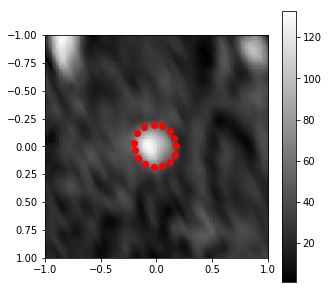

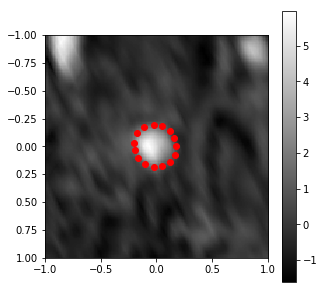

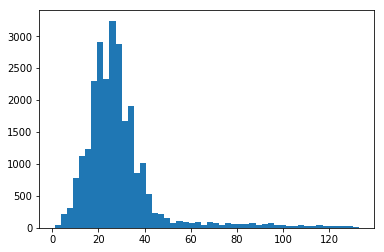

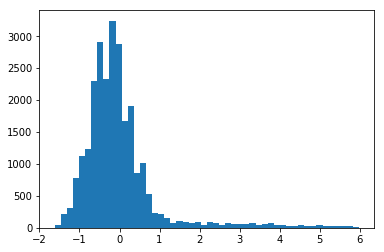

[-1.62034096 -0.52565741 -0.17996787 -0.06473802  0.10810675  0.33856645
  0.74187091  1.95178431  4.60207081  5.98482898]


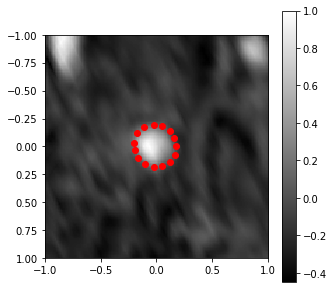

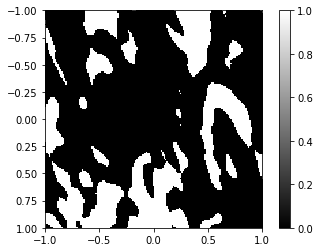

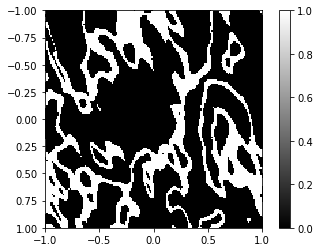

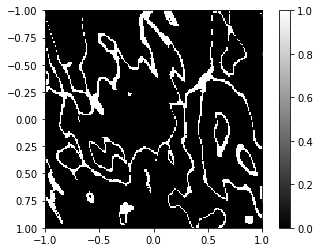

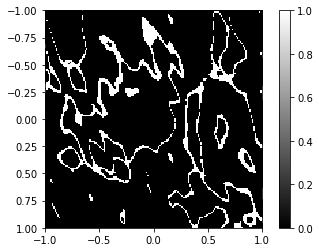

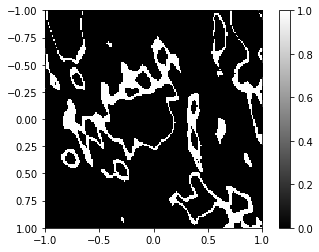

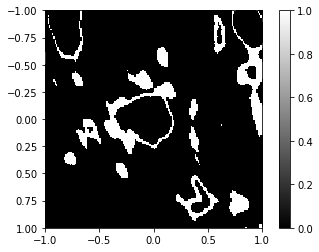

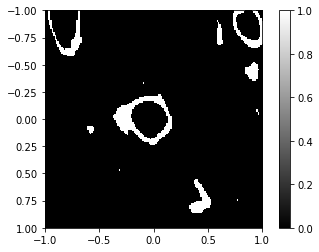

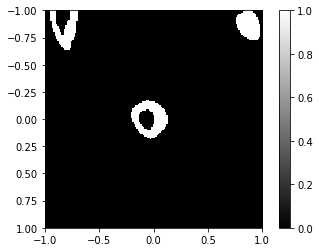

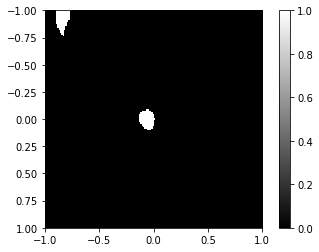

In [5]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

i = np.random.randint(N)
print(i)
x = X[i]


xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(5,5))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure()
plt.hist(np.ravel(x), bins=50)
plt.show()
plt.close()

plt.figure()
plt.hist(np.ravel(xnorm), bins=50)
plt.show()
plt.close()

quantiles = np.percentile(np.ravel(xnorm), q=[0, 25, 50, 60, 70, 80, 90, 95, 99, 100])
print(quantiles)

xnorm2 = (1.0*xnorm - quantiles[-4])/(quantiles[-1]-quantiles[-4])

plt.figure(figsize=(5,5))
plt.imshow(xnorm2,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

for i in range(len(quantiles)-1):
    qlow = quantiles[i]
    qhigh = quantiles[i+1]
    
    xthresh = xnorm.copy()
    xthresh[xthresh < qlow] = 0
    xthresh[xthresh > qhigh] = 0
    xthresh[xthresh != 0] = 1
    
    plt.figure()
    plt.imshow(xthresh, cmap='gray',extent=[-1, 1, 1, -1])
    plt.colorbar()
    plt.show()
    plt.close()

4965


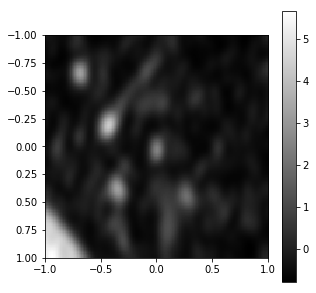

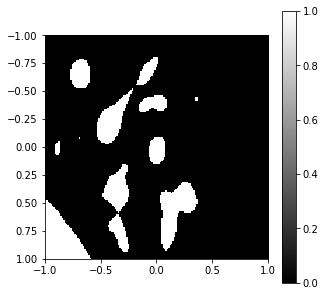

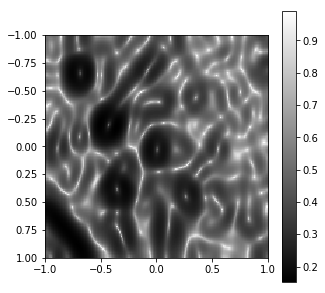

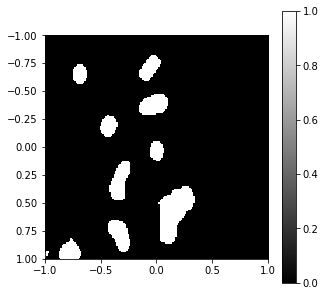

In [60]:
from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient
from scipy.ndimage.morphology import binary_fill_holes

i = np.random.randint(N)
print(i)
x = X[i]

thresh = 0.5

xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)
xnorm = filters.gaussian(xnorm, sigma=3)
y = xnorm.copy()
y[xnorm>thresh]  = 1.0
y[xnorm<=thresh] = 0 
y = binary_fill_holes(y).astype(int)

gimage = inverse_gaussian_gradient(xnorm, sigma=3)

ls = morphological_geodesic_active_contour(gimage, 230, y,
                                           smoothing=1, balloon=-1,
                                           threshold=0.5)

plt.figure(figsize=(5,5))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(y,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(gimage,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(ls,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()